In [42]:
import os, glob, sys
import numpy as np
import pandas as pd

# ## Load all the data so we explore it. 
# pfile = '../Data/training_2024-11-04.pickle'
# pfile_test = '../Data/testing_2024-11-04.pickle'
# if os.path.isfile(pfile):
#   SEPSISdat = pd.DataFrame.from_dict(pd.read_pickle(pfile))
SEPSISdat = pd.read_excel('../Data/(new values added) final_cleared_training_data.xlsx')
print(len(SEPSISdat.patient)) # should be n=200112

# if os.path.isfile(pfile_test):
#   SEPSISdat_test = pd.DataFrame.from_dict(pd.read_pickle(pfile_test))
SEPSISdat_test = pd.read_excel('../Data/(new values added) final_cleared_testing_data.xlsx')
print(len(SEPSISdat_test.patient)) # should be n=41993

200112
41993


In [43]:
SEPSISdat[SEPSISdat == '#DIV/0!'] = pd.NA
SEPSISdat_test[SEPSISdat_test == '#DIV/0!'] = pd.NA

In [44]:
## Forward-fill missing values
SEPSISdat.update(SEPSISdat.groupby('patient').ffill())
SEPSISdat_test.update(SEPSISdat_test.groupby('patient').ffill())

In [45]:
## Get reference ranges for variables using only non-sepsis patients as 'normal'
SEPSISdat_NOsepsis = SEPSISdat[~SEPSISdat.patient.isin(np.unique(SEPSISdat.patient[SEPSISdat.SepsisLabel==1]))]
SEPSISdat_NOsepsis = SEPSISdat_NOsepsis[SEPSISdat_NOsepsis.ICULOS>1]
SEPSISdat_NOsepsis.drop(['patient','SepsisLabel','Sex','sepsis_phase'],axis=1,inplace=True)
SEPSISdat_NOsepsis.astype('float')
meanSEPSISdat = round(SEPSISdat_NOsepsis.mean(axis=0),2)
sdSEPSISdat = round(SEPSISdat_NOsepsis.std(axis=0),2)
np.set_printoptions(suppress=True)
print('x_mean = np.array(')
print(np.array(meanSEPSISdat),')')
print('x_std = np.array(')
print(np.array(sdSEPSISdat),')')

x_mean = np.array(
[22.483086276517827 83.65169148644179 97.24919257297533 36.921502310806616
 123.05921362560665 81.62186081191251 62.97822337231015 18.410168007358152
 -0.6545070955107345 0.5195917473449472 7.385532110876428 40.4773167770947
 20.374429490225452 7.971795905570382 1.326917434547526 129.94526888506016
 2.041438136378721 4.111371163481743 31.191930361203276 10.465278653527882
 11.27773162469856 190.97613034741104 62.249884951679704
 209.93975564391198 0.07126708710616209 0.7005248147884082
 22.766485484466852 0.5189283329984509] )
x_std = np.array(
[15.219488138956043 16.461699928458142 2.8570804801278116
 0.6732569689872493 20.987803737485315 14.352533367405005
 12.03454965096187 4.107822400322196 2.2187471814738307
 0.14456276213290786 0.04686525105480836 5.686812588181284
 15.47626855484011 1.5019023444604387 1.4849539768912285 41.53404476419755
 0.3191696179159823 0.5357094357545182 5.294725315974648
 1.8364848999846632 4.853301449004494 88.51403535900336 15.81955136

In [46]:
## Obtain the z-scores for all the variables
SEPSISdat_zScores = SEPSISdat
SEPSISdat_test_zScores = SEPSISdat_test
cols = SEPSISdat_zScores.columns.drop(['patient','SepsisLabel','Sex','sepsis_phase'])
for c in cols:
  SEPSISdat_zScores[c] = (SEPSISdat_zScores[c]-meanSEPSISdat[c])/sdSEPSISdat[c]
  SEPSISdat_test_zScores[c] = (SEPSISdat_test_zScores[c]-meanSEPSISdat[c])/sdSEPSISdat[c]

In [47]:
## Replace values still missing with the mean
SEPSISdat_zScores = SEPSISdat_zScores.fillna(0)
SEPSISdat_test_zScores = SEPSISdat_test_zScores.fillna(0)

C:\Users\Rex\AppData\Local\Temp\ipykernel_6928\3534544806.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SEPSISdat_zScores = SEPSISdat_zScores.fillna(0)
C:\Users\Rex\AppData\Local\Temp\ipykernel_6928\3534544806.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SEPSISdat_test_zScores = SEPSISdat_test_zScores.fillna(0)


In [57]:
#### OPTION 1: LOGISTIC REGRESSION ####
## Build a logistic regression using all the training data
y = SEPSISdat_zScores.SepsisLabel
X = SEPSISdat_zScores.copy()
X.drop(['patient','SepsisLabel','sepsis_phase'],axis=1,inplace=True)
y_test = SEPSISdat_test_zScores.SepsisLabel
X_test = SEPSISdat_test_zScores.copy()
X_test.drop(['patient','SepsisLabel','sepsis_phase'],axis=1,inplace=True)


In [ ]:

from sklearn.linear_model import SGDClassifier
lreg = SGDClassifier(loss='log_loss', penalty='l1')
lreg.fit(X,y)
print('const=',np.round(lreg.intercept_,4))
print('coeffs = np.array(')
print(np.round(lreg.coef_,4),')')


const= [-4.2006]
coeffs = np.array(
[[ 0.2051 -0.0926  0.0639  0.3359  0.1113 -0.2501  0.14    0.1282  0.0594
   0.0836 -0.0408 -0.0678 -0.0086 -0.3101  0.1888  0.1429  0.0021 -0.1302
  -0.2135  0.3118 -0.0182  0.0486  0.024   0.0545 -0.2148 -0.0113  0.1591
  -0.0404 -0.133 ]] )


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Bicarbonate
- D/S BP
- PLR
- SF Ratio
- SI
- ...


In [60]:

## Add the predictions [Note: column 1 is the filename, which you don't get to see in the scoring and isn't helpful otherwise here]
# X = X.assign(probSepsisLR=lreg.predict_proba(X.iloc)[::,1])
# X_test = X_test.assign(probSepsisLR=lreg.predict_proba(SEPSISdat_test_zScores.iloc[:,1:24])[::,1])
y_pred = lreg.predict_proba(X)[:,1]
y_test_pred = lreg.predict_proba(X_test)[:,1]
#print(SEPSISdat_zScores)


AUC: 0.733
AUC_test: 0.728
thresh= 0.0241


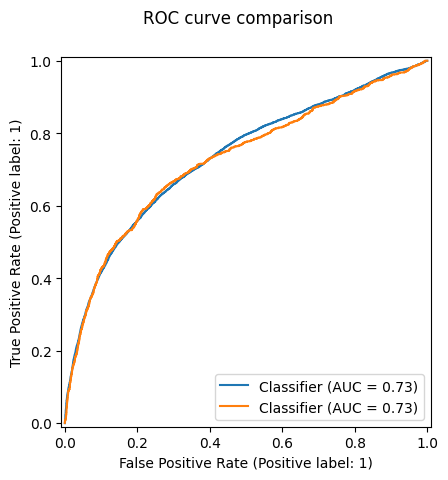

In [62]:

## Quick but not necessarily great way to find a threshold. Also calculate the AUC
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y,y_pred)
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_test_pred)
train_disp=RocCurveDisplay.from_predictions(y,y_pred)
test_disp=RocCurveDisplay.from_predictions(y_test,y_test_pred, ax=train_disp.ax_)
train_disp.figure_.suptitle("ROC curve comparison")
print('AUC:',round(roc_auc_score(y,y_pred),3))
print('AUC_test:',round(roc_auc_score(y_test,y_test_pred),3))
thresh=round(thresholds[np.argmax(tpr - fpr)],4)
print('thresh=',thresh)

In [ ]:
# Quick calculation of utility score
SEPSISdat = SEPSISdat.assign(SepsisLabelLR = (SEPSISdat_zScores.probSepsisLR>thresh).astype(int))
SEPSISdat_test= SEPSISdat_test.assign(SepsisLabelLR = (SEPSISdat_test_zScores.probSepsisLR>thresh).astype(int))

import evaluate_sepsis_score as ev
util = ev.evaluate_utility(SEPSISdat.patient,np.array(SEPSISdat_zScores.SepsisLabel),np.array(SEPSISdat.SepsisLabelLR))
print(util)
util_test = ev.evaluate_utility(SEPSISdat_test.patient,np.array(SEPSISdat_test_zScores.SepsisLabel),np.array(SEPSISdat_test.SepsisLabelLR))
print(util_test)

100%|██████████| 5000/5000 [03:24<00:00, 24.46it/s]


0.3308


100%|██████████| 1000/1000 [00:09<00:00, 108.25it/s]

0.3583


In [64]:
#### OPTION 2: BOOSTED TREE #####
## Build a LightGBM model using all the training data
import lightgbm as lgb
train_data = lgb.Dataset(data=X, label=y)
param = {'objective': 'binary'}
bst = lgb.train(param, train_data, 10)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5303, number of negative: 194809
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5090
[LightGBM] [Info] Number of data points in the train set: 200112, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.026500 -> initscore=-3.603747
[LightGBM] [Info] Start training from score -3.603747


In [66]:

## Add the predictions [Note: column 1 is the filename, which you don't get to see in the scoring and isn't helpful otherwise here]
y_pred = bst.predict(data=X)
y_test_pred = bst.predict(data=X_test)


AUC: 0.847
AUC_test: 0.732
Threshold: 0.0359


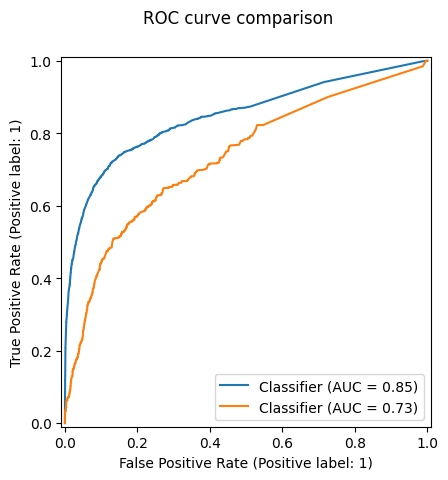

In [67]:

## Quick but not necessarily great way to find a threshold. Also calculate the AUC
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y,y_pred)
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_test_pred)
train_disp=RocCurveDisplay.from_predictions(y,y_pred)
test_disp=RocCurveDisplay.from_predictions(y_test,y_test_pred, ax=train_disp.ax_)
train_disp.figure_.suptitle("ROC curve comparison")

print('AUC:',round(roc_auc_score(y,y_pred),3))
print('AUC_test:',round(roc_auc_score(y_test,y_test_pred),3))

# Save the model and get the threshold for use as a model
bst.save_model('lightgbm.model')
thresh=round(thresholds[np.argmax(tpr - fpr)],4)
print('Threshold:',thresh)

In [ ]:
# Quick calculation of utility score
SEPSISdat = SEPSISdat.assign(SepsisLabelGBM = (SEPSISdat_zScores.probSepsisGBM>thresh).astype(int))
SEPSISdat_test= SEPSISdat_test.assign(SepsisLabelGBM = (SEPSISdat_test_zScores.probSepsisGBM>thresh).astype(int))

import evaluate_sepsis_score as ev
util = ev.evaluate_utility(SEPSISdat.patient,np.array(SEPSISdat_zScores.SepsisLabel),np.array(SEPSISdat.SepsisLabelGBM))
print(util)
util_test = ev.evaluate_utility(SEPSISdat_test.patient,np.array(SEPSISdat_test_zScores.SepsisLabel),np.array(SEPSISdat_test.SepsisLabelGBM))
print(util_test)

100%|█████████████████████████████████████████████████████████| 5000/5000 [03:15<00:00, 25.53it/s]


0.5076


100%|████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.55it/s]

0.3339


In [ ]:
## OPTION 4: Support Vector Machine ##
exit(0)
from sklearn import svm
clf = svm.LinearSVC(max_iter=3000)
clf.fit(SEPSISdat_zScores.iloc[:,1:24],SEPSISdat_zScores.SepsisLabel)

## Add the predictions
SEPSISdat_zScores = SEPSISdat_zScores.assign(probSepsisSVM=clf.predict(SEPSISdat_zScores.iloc[:,1:24]))
SEPSISdat_test_zScores = SEPSISdat_test_zScores.assign(probSepsisSVM=clf.predict(SEPSISdat_test_zScores.iloc[:,1:24]))

## Quick but not necessarily great way to find a threshold. Also calculate the AUC
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(SEPSISdat_zScores.SepsisLabel,SEPSISdat_zScores.probSepsisSVM)
print('AUC:',round(roc_auc_score(SEPSISdat_zScores.SepsisLabel,SEPSISdat_zScores.probSepsisSVM),2))
print('AUC_test:',round(roc_auc_score(SEPSISdat_test_zScores.SepsisLabel,SEPSISdat_test_zScores.probSepsisSVM),2))
thresh=round(thresholds[np.argmax(tpr - fpr)],4)
print('Threshold:',thresh)

# Quick calculation of utility score
SEPSISdat = SEPSISdat.assign(SepsisLabelSVM = (SEPSISdat_zScores.probSepsisSVM>thresh).astype(int))
SEPSISdat_test= SEPSISdat_test.assign(SepsisLabelSVM = (SEPSISdat_test_zScores.probSepsisSVM>thresh).astype(int))

import evaluate_sepsis_score as ev
util = ev.evaluate_utility(SEPSISdat.patient,np.array(SEPSISdat_zScores.SepsisLabel),np.array(SEPSISdat.SepsisLabelSVM))
print(util)
util_test = ev.evaluate_utility(SEPSISdat_test.patient,np.array(SEPSISdat_test_zScores.SepsisLabel),np.array(SEPSISdat_test.SepsisLabelSVM))
print(util_test)

/usr/local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
## OPTION 3: KNN Classifier ##
exit(0)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(SEPSISdat_zScores.iloc[:,1:24],SEPSISdat_zScores.SepsisLabel)

## Add the predictions
SEPSISdat_zScores = SEPSISdat_zScores.assign(probSepsisKNN=model.predict(SEPSISdat_zScores.iloc[:,1:24]))
SEPSISdat_test_zScores = SEPSISdat_test_zScores.assign(probSepsisKNN=model.predict(SEPSISdat_test_zScores.iloc[:,1:24]))

## Quick but not necessarily great way to find a threshold. Also calculate the AUC
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(SEPSISdat_zScores.SepsisLabel,SEPSISdat_zScores.probSepsisKNN)
print('AUC:',round(roc_auc_score(SEPSISdat_zScores.SepsisLabel,SEPSISdat_zScores.probSepsisKNN),2))
print('AUC_test:',round(roc_auc_score(SEPSISdat_test_zScores.SepsisLabel,SEPSISdat_test_zScores.probSepsisKNN),2))
thresh=round(thresholds[np.argmax(tpr - fpr)],4)
print('Threshold:',thresh)

In [ ]:
# Quick calculation of utility score
SEPSISdat = SEPSISdat.assign(SepsisLabelKNN = (SEPSISdat_zScores.probSepsisKNN>thresh).astype(int))
SEPSISdat_test= SEPSISdat_test.assign(SepsisLabelKNN = (SEPSISdat_test_zScores.probSepsisKNN>thresh).astype(int))

import evaluate_sepsis_score as ev
util = ev.evaluate_utility(SEPSISdat.patient,np.array(SEPSISdat_zScores.SepsisLabel),np.array(SEPSISdat.SepsisLabelKNN))
print(util)
util_test = ev.evaluate_utility(SEPSISdat_test.patient,np.array(SEPSISdat_test_zScores.SepsisLabel),np.array(SEPSISdat_test.SepsisLabelKNN))
print(util_test)